In [44]:
import sage_data_client
import xarray as xr
import matplotlib
import pyart
import urllib
%matplotlib inline

In [39]:
df = sage_data_client.query(
            start="-1h",
            filter={"name": "upload", "vsn": "W08D",
                   "plugin": "10.31.81.1:5000/local/plugin-mrrpro"},).set_index("timestamp")

In [47]:
df["value"][0]

'https://storage.sagecontinuum.org/api/v1/data/Pluginctl/sage-mrrpro-latest/000048b02d3ae277/1685541975821662381-20230321_150000.nc'

In [48]:
local_filename, headers = urllib.request.urlretrieve(df["value"][0])
ds = xr.open_dataset(local_filename)

HTTPError: HTTP Error 401: Unauthorized

In [37]:
ds

<xarray.Dataset>
Dimensions:                 (time: 8640, range: 256, sweep: 1, n_spectra: 256,
                             spectrum_n_samples: 32)
Coordinates:
  * range                   (range) float32 0.0 35.0 70.0 ... 8.89e+03 8.925e+03
  * time                    (time) datetime64[ns] 2023-05-19T00:00:00.0065589...
    elevation               (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
    azimuth                 (time) float32 dask.array<chunksize=(360,), meta=np.ndarray>
Dimensions without coordinates: sweep, n_spectra, spectrum_n_samples
Data variables: (12/31)
    volume_number           (time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    time_coverage_start     (time) |S128 b'2023-05-19T00:00:00Z' ... b'2023-0...
    time_coverage_end       (time) |S128 b'2023-05-19T00:59:50Z' ... b'2023-0...
    time_reference          (time) |S128 b'1970-01-01T00:00:00Z' ... b'1970-0...
    instrument_type         (time) |S128 b'radar' b'radar' ... b'radar' b'radar'
    transfer_function       (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    ...                      ...
    ML                      (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    SNR                     (time, range) float32 dask.array<chunksize=(360, 256), meta=np.ndarray>
    index_spectra           (time, range) float64 dask.array<chunksize=(360, 256), meta=np.ndarray>
    spectrum_raw            (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    N                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
    D                       (time, n_spectra, spectrum_n_samples) float64 dask.array<chunksize=(360, 256, 32), meta=np.ndarray>
Attributes:
    Conventions:      CF/Radial
    version:          1.3
    title:            METEK MRR Pro 1.2.5 Data
    institution:      
    references:       
    source:           
    history:          
    comment:          
    instrument_name:  METEK MRR Pro 1.2.5, ID: MRRPro97, METEK Serial Number:...
    site_name:        cms-mrr-002
    field_names:      Za,Z,Zea,Ze,RR,LWC,PIA,VEL,WIDTH,SNR,spectrum_reflectiv...

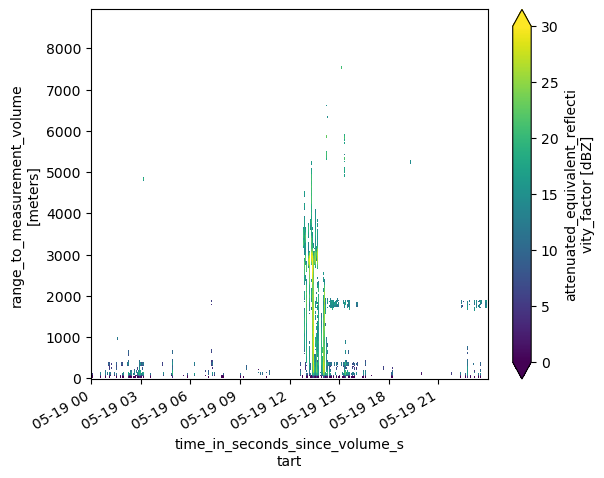

In [42]:
ds["Zea"].T.plot(vmin=0, vmax=30)